In [1]:
from autocluster import AutoCluster

import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("../data/Financial_Distress.csv").drop(columns=['Time', 'Company', 'Financial Distress', 'class'])
df.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,0.182790,0.006449,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,0.035991,0.001795,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,-0.765400,-0.054324,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.107910,-0.065316,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,0.577250,0.094075,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [3]:
cluster = AutoCluster()
smac_obj, opt_cfg = cluster.fit_raw_data(df=df, numerical_cols=list(df.columns), n_evaluations=5)

/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:66: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '') > 0
/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:70: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:79: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size


Configuration space object:
  Hyperparameters:
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    clustering_choice, Type: Categorical, Choices: {KMeans, GaussianMixture, MiniBatchKMeans, AgglomerativeClustering}, Default: KMeans
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    dim_reduction_choice, Type: Categorical, Choices: {TSNE, PCA, IncrementalPCA, KernelPCA, FastICA, TruncatedSVD}, Default: TSNE
    early_exaggeration___TSNE, Type: UniformFloat, Range: [5.0, 20.

performing TSNE


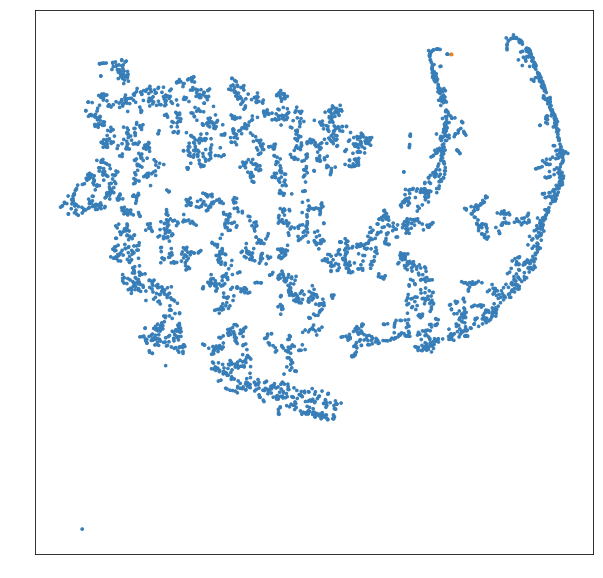

In [5]:
predictions = cluster.predict(df.to_numpy())

In [6]:
from collections import Counter
Counter(predictions)

Counter({0: 3671, 1: 1})